In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Normalizer
from IPython.display import clear_output

df = pd.read_pickle('treino.pkl.gz')

df = df[['pri_qtd_tot_emp', 'pri_qtd_tot_emp_atv', 'pri_qtd_tot_def',
       'pri_emp_abt', 'pri_emp_san', 'pri_emp_tom', 'sec_qtd_tot_emp',
       'sec_qtd_tot_emp_atv', 'sec_qtd_tot_def', 'sec_emp_abt', 'sec_emp_san',
       'sec_emp_tom', 'default']]

def pre_proc_and_split(dataframe, target):
    
    cols = dataframe.columns.tolist()
    cols.remove(target)
    
    x = dataframe[cols]
    y = dataframe[target]
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
                                        
    for i in cols:
        nr = Normalizer()
        X_train[i] = nr.fit_transform(X_train[[i]])
        X_test[i] = nr.transform(X_test[[i]])
        
    return X_train, X_test, y_train, y_test

def step(xtrain, xtest, ytrain, ytest):
    lr = LogisticRegression()
    lr.fit(xtrain, ytrain)
    pred = lr.predict_proba(xtest)
    
    pr = [i[1] for i in pred]

    score = roc_auc_score(y_true = ytest, y_score = pr) 

    cfs = lr.coef_.tolist()[0]
    cfs = [abs(i) for i in cfs]
    lista = [i for i in zip(cfs, xtest.columns)]
    lista.sort()
    data_cfs = [i[0] for i in lista]
    data_feats = [i[1] for i in lista]

    dropd = lista[0][1]
    lista = lista[1:]
    remaining_feats = [i[1] for i in lista]
    
    return remaining_feats, score, dropd

def my_stepwise(dataframe, target):
    itr = len(dataframe.drop(columns = [target]).columns.tolist()) 
    dici = {}

    for n in range(itr):
    
        xtrain, xtest, ytrain, ytest = pre_proc_and_split(dataframe, target)
        clear_output()
        remaining, score, dropd = step(xtrain, xtest, ytrain, ytest)
        dici[n] = [score, dataframe.columns.tolist()]
        dataframe = dataframe.drop(columns = [dropd])
        
    return dici

def plot_stepwise(dataframe, target):
    plt.style.use('dark_background')
    plt.rcParams['figure.figsize'] = (10, 5)
    d = my_stepwise(dataframe, target)

    plot_vals = []
    for i in d.keys():
        plot_vals.append(d[i][0])
    
    plt.plot(plot_vals)
    plt.show()

    print('FEATURES INCLUÍDAS EM CADA STEP')
    for i in d.keys():
        fs = d[i][1].remove('default')
        print(i , ':', d[i][1])
    print('')
    print('SCORE DE CADA STEP')
    for i in d.keys():
        print(i , ':', round(d[i][0], 5))

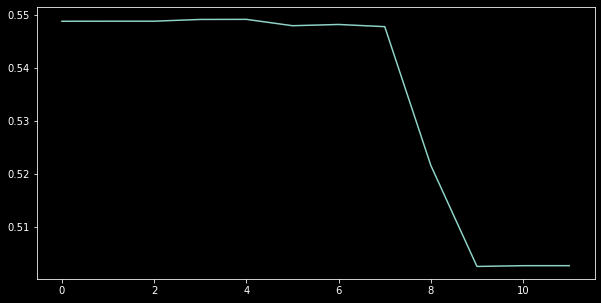

FEATURES INCLUÍDAS EM CADA STEP
0 : ['pri_qtd_tot_emp', 'pri_qtd_tot_emp_atv', 'pri_qtd_tot_def', 'pri_emp_abt', 'pri_emp_san', 'pri_emp_tom', 'sec_qtd_tot_emp', 'sec_qtd_tot_emp_atv', 'sec_qtd_tot_def', 'sec_emp_abt', 'sec_emp_san', 'sec_emp_tom']
1 : ['pri_qtd_tot_emp', 'pri_qtd_tot_emp_atv', 'pri_qtd_tot_def', 'pri_emp_abt', 'pri_emp_san', 'sec_qtd_tot_emp', 'sec_qtd_tot_emp_atv', 'sec_qtd_tot_def', 'sec_emp_abt', 'sec_emp_san', 'sec_emp_tom']
2 : ['pri_qtd_tot_emp', 'pri_qtd_tot_emp_atv', 'pri_qtd_tot_def', 'pri_emp_abt', 'pri_emp_san', 'sec_qtd_tot_emp', 'sec_qtd_tot_emp_atv', 'sec_qtd_tot_def', 'sec_emp_san', 'sec_emp_tom']
3 : ['pri_qtd_tot_emp', 'pri_qtd_tot_emp_atv', 'pri_qtd_tot_def', 'pri_emp_san', 'sec_qtd_tot_emp', 'sec_qtd_tot_emp_atv', 'sec_qtd_tot_def', 'sec_emp_san', 'sec_emp_tom']
4 : ['pri_qtd_tot_emp', 'pri_qtd_tot_def', 'pri_emp_san', 'sec_qtd_tot_emp', 'sec_qtd_tot_emp_atv', 'sec_qtd_tot_def', 'sec_emp_san', 'sec_emp_tom']
5 : ['pri_qtd_tot_emp', 'pri_qtd_tot_def'

In [4]:
plot_stepwise(df, 'default')